In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Problem-1 (Part-1):

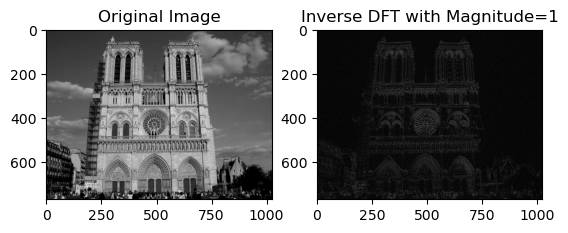

True

In [55]:
# Step 1: Load the image
image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Step 3: Modify the magnitude of the DFT to be 1
magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
magnitude = np.ones_like(magnitude)

# Step 4: Combine magnitude and phase
dft[:, :, 0], dft[:, :, 1] = cv2.polarToCart(magnitude, phase)

# Step 5: Compute the inverse DFT
inverse_dft = cv2.idft(dft)

# Extract the real part (as the imaginary part should be close to zero)
result_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

# Display the original and result images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_image, cmap='gray'), plt.title('Inverse DFT with Magnitude=1')
plt.show()

cv2.imwrite('P1-Q1.png', result_image)

# ref: https://github.com/AxelrodAdil/ImageProcessing

### Problem-1 (Part-2)

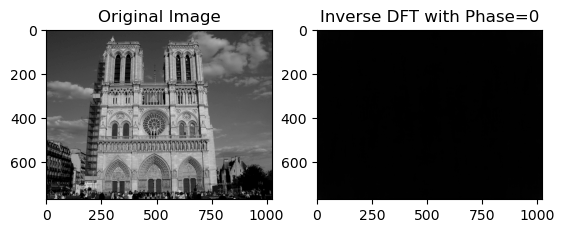

True

In [53]:
# Step 1: Load the image
image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Step 3: Set the phase to 0
magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
phase = np.zeros_like(phase)

# Step 4: Combine magnitude and phase
dft[:, :, 0], dft[:, :, 1] = cv2.polarToCart(magnitude, phase)

# Step 5: Compute the inverse DFT
inverse_dft = cv2.idft(dft)

# Extract the real part (as the imaginary part should be close to zero)
result_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

# Display the original and result images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_image, cmap='gray'), plt.title('Inverse DFT with Phase=0')
plt.show()

cv2.imwrite('P1-Q2.png', result_image)

# ref: https://github.com/AxelrodAdil/ImageProcessing

In [56]:
# inputPath = "origin-P1.png"
# outputPath = "h1-test.png"

# f1(inputPath, outputPath, magnitude=1)

In [57]:
v = [1, 2, 3, 4, 5]
print(v)

v = np.fft.fft(v)
print(v)

v = np.abs(v)
print(v)

v = np.ones_like(v)
print(v)

# ref: https://www.cuemath.com/questions/what-is-the-absolute-value-of-the-complex-number-4-2i-14-32-14-18/

[1, 2, 3, 4, 5]
[15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]
[15.          4.25325404  2.62865556  2.62865556  4.25325404]
[1. 1. 1. 1. 1.]


### Problem-1 (Part-3) the similarity and differences of f1(x, y) and f2(x, y) relative to the original image:

- Magnitude Impact:

    - (Set Parameters) The problem-1 sets the magnitude to 1, creating a uniform magnitude spectrum; however, problem-2 leaves the magnitude unchanged.
  
    - Setting the magnitude of an image to 1 will have a significant impact on the image. `The image will lose all of its contrast and will appear as a uniform gray color.` This is because the magnitude of the Fourier transform of an image represents the contrast of the image. When the magnitude is set to 1, all of the frequency components of the image are given equal weight, which results in a uniform gray image.

  - In addition, the results in an image where all spatial frequencies have the same intensity.
  

- Phase Impact:
  - (Set Parameters) The problem-2 sets the phase to 0 for all frequencies, creating a uniform phase spectrum; however, problem-1 leaves the phase unchanged.
  
  - Setting the phase of an image to zero will also have a significant impact on the image. `The image will lose all of its spatial information and will appear as a random pattern of noise`. This is because the phase of the Fourier transform of an image represents the spatial arrangement of the image. When the phase is set to zero, all of the frequency components of the image are given the same phase, which results in a random pattern of noise.
  
  - In addition, the results in an image where all spatial frequencies have the same phase.
  

- Combined Impact on Image:
   - This operation essentially removes variations in amplitude across different frequencies, resulting in an image where all spatial frequencies contribute equally to the final pixel values.
   - The significance of such operations may be more apparent in specific applications, such as image processing or certain types of filtering in the frequency domain. These operations can be part of techniques like image normalization or manipulation of frequency components for specific effects.

### Problem-1 (Part-4)

In [112]:
def applyingFilters(inputPath, outputPath, customFilter, std=0.1):
    
    # Step 1: Load the image
    image = cv2.imread(inputPath)
    
    # Step 2: Convert "colored" to "gray"
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply FFT: convert into frequency domain:
    fft = np.fft.fft2(image)

    # Step 4: Creates noise and adds it to the original image:
    noise = np.random.normal(loc=0.0, scale=std, size=(image.shape)) # mean=0, std = std
    noisyImage = fft + noise

    # Step 5: Apply inverser FFT on noisy image:
    noisyImage = np.fft.ifft2(noisyImage).real

    # Step 6: Apply "customFilter" on noisy image in spatial domain:
    reformedImage = cv2.filter2D(noisyImage, -1, customFilter)

    # Step 7: Normalizes the filter: the RGB should be within 0-255.
    reformedImage = cv2.normalize(reformedImage, None, 0, 255, cv2.NORM_MINMAX)
    
    
    # Saves image
    cv2.imwrite(outputPath, reformedImage)
#end-def

In [116]:
inputPath = "origin-P1.png"
outputPath = "P1-Q4-h2.png"

h1 = np.array([
     [0, -1/3, 0],
     [0, -1/6, 0],
     [0, 0, 0],
     [0, 1/6, 0],
     [0, 1/3, 0],
])

h2 = np.ones((5, 5)) / 25

applyingFilters(inputPath, outputPath, h1, std=0.1)

In [107]:
# help(np.random.normal)

#### ignore solution:

In [110]:
import cv2
import numpy as np

# Define the original image
original_image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# Generate noisy image
noisy_image = original_image + np.random.normal(0, 0.1, original_image.shape)

# Compute the Fourier transform of the noisy image
noisy_dft = cv2.dft(noisy_image, cv2.DFT_COMPLEX_OUTPUT)

# Define the h1 filter
h1 = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]])

# Define the h2 filter
h2 = np.array([[1, -1, 1],
                 [-1, 0, -1],
                 [1, -1, 1]])

# Apply the h1 filter in the frequency domain
filtered_dft_h1 = noisy_dft * cv2.dft(h1, cv2.DFT_COMPLEX_OUTPUT)

# Apply the h2 filter in the frequency domain
filtered_dft_h2 = noisy_dft * cv2.dft(h2, cv2.DFT_COMPLEX_OUTPUT)

# Compute the inverse Fourier transform of the filtered DFTs
filtered_image_h1 = np.fft.ifftn(filtered_dft_h1).real
filtered_image_h2 = np.fft.ifftn(filtered_dft_h2).real

# Display the filtered images, noisy image, and the original image
cv2.imshow('Original Image', original_image)
cv2.imshow('Noisy Image', noisy_image)
cv2.imshow('Filtered Image (h1)', filtered_image_h1.astype(np.uint8))
cv2.imshow('Filtered Image (h2)', filtered_image_h2.astype(np.uint8))

# Display the filtered DFTs and noisy DFT
cv2.imshow('Filtered DFT (h1)', np.log10(np.abs(filtered_dft_h1) + 1))
cv2.imshow('Filtered DFT (h2)', np.log10(np.abs(filtered_dft_h2) + 1))
cv2.imshow('Noisy DFT', np.log10(np.abs(noisy_dft) + 1))

cv2.waitKey(0)

error: OpenCV(4.8.1) /io/opencv/modules/core/src/dxt.cpp:3508: error: (-215:Assertion failed) type == CV_32FC1 || type == CV_32FC2 || type == CV_64FC1 || type == CV_64FC2 in function 'dft'


#### Problem-2: